In [1]:
# working through chapter 03 of Python Machine Learning, available from PACKT publishing
# using the code from that book, along with some modifications of my own


In [2]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

In [3]:
# split the set into training and test datasets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# use Z-scaling on the features - this appears to be held wtihin a function
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_train_std[1:5]

array([[ 0.93066067,  0.73721938],
       [ 1.04202177,  1.6373128 ],
       [ 0.6522579 ,  0.35146505],
       [ 1.09770233,  0.73721938]])

In [4]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [5]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum() )


Misclassified samples: 4


In [6]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


<module 'matplotlib.pyplot' from 'C:\Users\Philip\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>

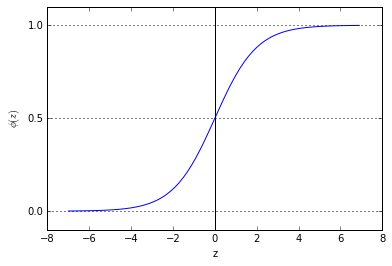

In [7]:
# plot the sigmoid function
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color="k")
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
y_valid = lr.predict(X_test_std)
accuracy_score(y_test, y_valid)

0.97777777777777775

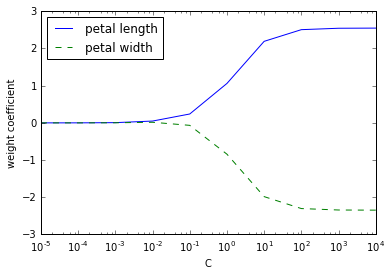

In [28]:
# build out a regularized logistic regression
weights, params = [], []
for c in np.arange(-5,5):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0]
        , label='petal length'
        )
plt.plot(params, weights[:,1]
        , linestyle='--'
         , label='petal width'
        )
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')

In [35]:
# build an SVM to examine similar constructs 
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)
y_valid = svm.predict(X_test_std)
accuracy_score(y_test, y_valid)

0.97777777777777775

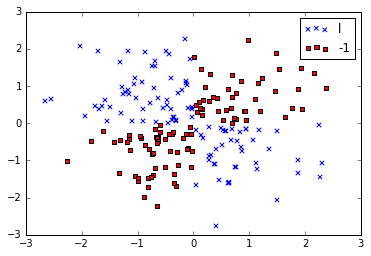

In [49]:
# create a scenario with a non-linear dataset, to 
# demonstrate the use of the kernel in non-linear 
# separation
np.random.seed(0)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:,1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor==1, 0]
           , X_xor[y_xor==1, 1]
           , c='b'
           , marker='x'
           , label='l'
           )
plt.scatter(X_xor[y_xor==-1, 0]
           , X_xor[y_xor==-1, 1]
           , c='r'
           , marker='s'
           , label='-1'
           )
plt.ylim(-3.0)
plt.legend()

In [50]:
# the gamma parameter will dictate the influence of the 
# training samples - start with a conservative gamma
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
y_valid = svm.predict(X_test_std)
accuracy_score(y_valid, y_test)

0.97777777777777775

In [51]:
# pick a larger gamma parameter
svm = SVC(kernel='rbf', random_state=0, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
y_valid = svm.predict(X_test_std)
accuracy_score(y_valid, y_test)
# dramatic decrease in accuracy

0.80000000000000004

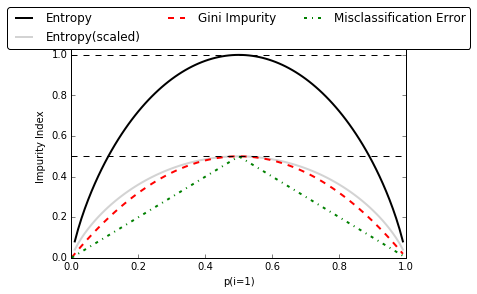

In [69]:
# Decision trees
# visual of impurity metrics
def gini(p):
    return (p)*(1-(p)) + (1 - p)*(1 - (1 - p))
def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1-p))
def error(p):
    return 1 - np.max([p, 1- p])
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c in zip([ent, sc_ent, gini(x), err]
                        , ['Entropy', 'Entropy(scaled)'
                          , 'Gini Impurity'
                          , 'Misclassification Error']
                         , ['-', '-', '--', '-.']
                         , ['black', 'lightgray', 'red', 'green', 'cyan']
                        ):
    line = ax.plot(x, i, label=lab, linestyle=ls
                , lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15)
         , ncol=3, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')

In [72]:
# now, actually build a decision tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy'
                             , max_depth=3, random_state=0)
tree.fit(X_train, y_train)
y_valid = tree.predict(X_test)
accuracy_score(y_valid, y_test)

0.97777777777777775

In [76]:
# building off of that, let's train a random forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy'
                               , n_estimators=10
                                , random_state=1
                                , n_jobs=2
                               )
forest.fit(X_train, y_train)
y_valid = forest.predict(X_test)
accuracy_score(y_valid, y_test)

0.9555555555555556

In [80]:
# final classification approach - use knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2
                           , metric='minkowski')
knn.fit(X_train_std, y_train)
y_valid = knn.predict(X_test_std)
accuracy_score(y_valid, y_test)
# Dang

1.0